<a href="https://colab.research.google.com/github/iriscob/Analisis-de-Ventas-Rendimiento/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175


#1. Análisis de facturación



   Tienda      |  Ingresos Totales 
------------------------------------
Tienda 1       | $1,150,880,400.00
Tienda 2       | $1,116,343,500.00
Tienda 3       | $1,098,019,600.00
Tienda 4       | $1,038,375,700.00


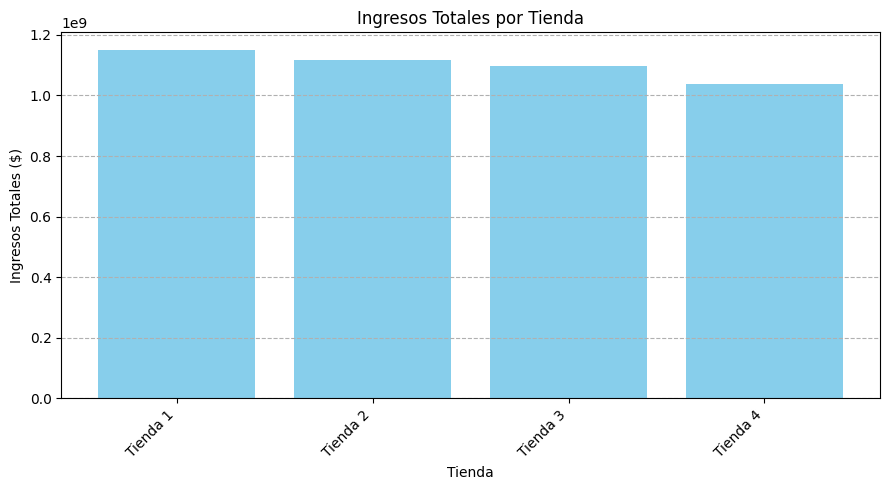

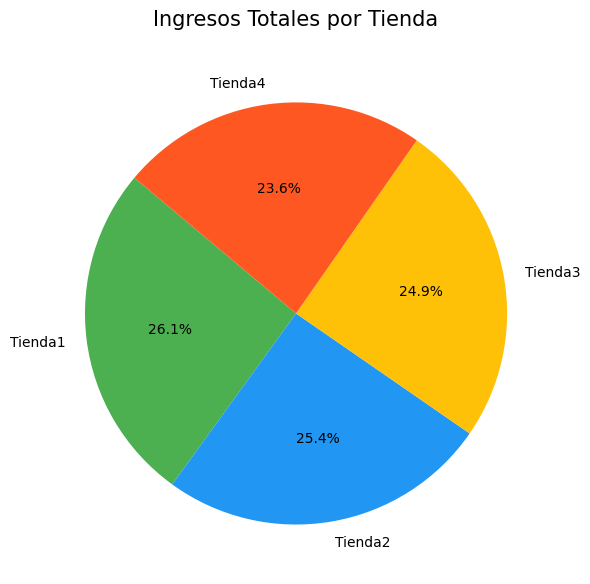

In [4]:
# Analisis de Facturación
# Ingresos totales por Tienda / Analizar el desempeño de cuatro tiendas

import pandas as pd
import matplotlib.pyplot as plt

tiendas = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

ingresos_por_tienda = {}

print("=" * 36)
print(f"{'   Tienda     ':} | {' Ingresos Totales '}")
print("-" * 36)

for nombre_tienda, tabla_datos_csv in tiendas.items():
    nueva_tabla = pd.read_csv(tabla_datos_csv)  # Se crea nuevatabla con los datos de la tabla csv
    suma_precio_tienda = nueva_tabla['Precio'].sum() # Se suma toda la columna precio de cada tienda
    print(f"{nombre_tienda:<14} | ${suma_precio_tienda:,.2f}")
    ingresos_por_tienda[nombre_tienda] = suma_precio_tienda

print("=" * 36)

# Crear el gráfico de barras
nombres_tiendas = list(ingresos_por_tienda.keys())
valores_ingresos = list(ingresos_por_tienda.values())

plt.figure(figsize=(9, 5))
plt.bar(nombres_tiendas, valores_ingresos, color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.title('Ingresos Totales por Tienda')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Crear gráfico circular
plt.figure(figsize=(6, 6))  # Ajusta el tamaño de la figura para que sea cuadrada.
labels = ingresos.keys()  # Nombres de las tiendas para las etiquetas.
sizes = ingresos.values()  # Valores de los ingresos para los tamaños de las porciones.
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722']  # Colores para cada tienda.

# Crear el gráfico circular
plt.pie(sizes,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',  # Formato de los porcentajes mostrados en el gráfico.
        startangle=140)  # Ángulo de inicio para la primera porción.

# Añadir título
plt.title('Ingresos Totales por Tienda', fontsize=15, pad=20)

# Asegurar que el gráfico sea un círculo
plt.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [12]:
# Calculo de la cantidad de productos vendidos por categoría de cada tienda.

import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Función para contar productos por categoría
def analizar_categorias(tabla_datos_csv, nombre_tienda):
    ventas_por_categoria = tabla_datos_csv['Categoría del Producto'].value_counts().reset_index() # busca todas las categorias y suma las veces que se encuentran en la columna seleccionada.
    # ventas_por_categoria.columns = ['Categoría del Producto', 'Cantidad']
    # ventas_por_categoria['Tienda'] = nombre_tienda  # Agregar columna de tienda
    return ventas_por_categoria

# Aplicar función a cada tienda
resultados = {
    'Tienda1': analizar_categorias(tienda, 'Tienda1'),
    'Tienda2': analizar_categorias(tienda2, 'Tienda2'),
    'Tienda3': analizar_categorias(tienda3, 'Tienda3'),
    'Tienda4': analizar_categorias(tienda4, 'Tienda4')
}

# Mostrar top 8 categorías por tienda
for nombre, df in resultados.items():
    print(f"------------------------------------------------")
    print(f"\n {nombre} - Los 8 productos mas vendidos Categorías:")
    print(df.head(8))
    print(f"________________________________________________/")



------------------------------------------------

 Tienda1 - Los 8 productos mas vendidos Categorías:
    Categoría del Producto  count
0                  Muebles    465
1             Electrónicos    448
2                 Juguetes    324
3        Electrodomésticos    312
4     Deportes y diversión    284
5   Instrumentos musicales    182
6                   Libros    173
7  Artículos para el hogar    171
________________________________________________/
------------------------------------------------

 Tienda2 - Los 8 productos mas vendidos Categorías:
    Categoría del Producto  count
0                  Muebles    442
1             Electrónicos    422
2                 Juguetes    313
3        Electrodomésticos    305
4     Deportes y diversión    275
5   Instrumentos musicales    224
6                   Libros    197
7  Artículos para el hogar    181
________________________________________________/
------------------------------------------------

 Tienda3 - Los 8 productos mas ven

# 3. Calificación promedio de la tienda



Calificaciones Promedio por Tienda (1-5 estrellas):
         Calificación Promedio
Tienda1               3.976685
Tienda2               4.037304
Tienda3               4.048326
Tienda4               3.995759


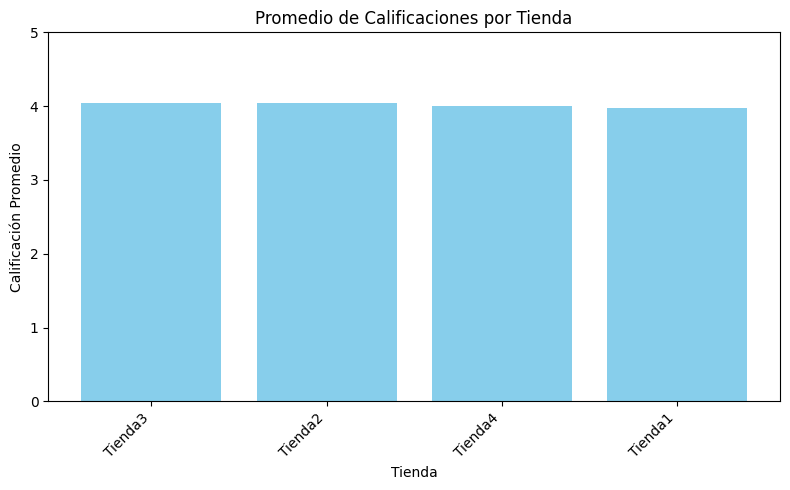

In [4]:
# Calificaciones promedio de los clientes para cada tienda.

# Importamos las librerías que vamos a usar
import pandas as pd
import matplotlib.pyplot as plt

url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tiendas_data = {'Tienda1': pd.read_csv(url_tienda1),
                'Tienda2': pd.read_csv(url_tienda2),
                'Tienda3': pd.read_csv(url_tienda3),
                'Tienda4': pd.read_csv(url_tienda4)}


promedios_por_tienda = {} # Diccionario para guardar los resultados del promedio de cada tienda

for nombre_tienda, datos_tienda in tiendas_data.items():
        promedio_tienda = datos_tienda['Calificación'].mean()  # Calculamos el promedio de los valores en la columna 'Calificación'
        promedios_por_tienda[nombre_tienda] = promedio_tienda # Guardamos el promedio en nuestro diccionario prom por tienda

# Convertimos nuestro diccionario de promedios en un DataFrame de pandas.
df_promedios = pd.DataFrame.from_dict(promedios_por_tienda, orient='index', columns=['Calificación Promedio'])

# Ordenamos el DataFrame por la calificación promedio
df_promedios_ordenado = df_promedios.sort_values('Calificación Promedio', ascending=False)

# Imprimimos los resultados
print("\nCalificaciones Promedio por Tienda (1-5 estrellas):")
print(df_promedios)
# print(df_promedios_ordenado.to_markdown(floatfmt=".2f"))

# --- Opcional: Crear un gráfico de barras ---
nombres_tiendas = df_promedios_ordenado.index
promedios = df_promedios_ordenado['Calificación Promedio']

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, promedios, color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Promedio de Calificaciones por Tienda')
plt.ylim(0, 5)  # Asumimos que la calificación es de 1 a 5
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [1]:
# Productos más vendidos y los menos vendidos en cada tienda
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos (usando tu código base)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

def ventas_x_productos(tabla_datos_csv, nombre_tienda):
    ventas_por_producto = tabla_datos_csv['Producto'].value_counts().reset_index() # busca todas las categorias y suma las veces que se encuentran en la columna seleccionada.
    return ventas_por_producto

# Aplicar función a cada tienda
resultados = {
    'Tienda1': ventas_x_productos(tienda, 'Tienda1'),
    'Tienda2': ventas_x_productos(tienda2, 'Tienda2'),
    'Tienda3': ventas_x_productos(tienda3, 'Tienda3'),
    'Tienda4': ventas_x_productos(tienda4, 'Tienda4')
}


for nombre, df in resultados.items():
    print(f"------------------------------------------------")
    print(f"\ {nombre} - Los 10 productos más vendidos :")
    print(f"------------------------------------------------")
    print(df.head(10))
    print(f"________________________________________________/")

for nombre, df in resultados.items():
    print(f"------------------------------------------------")
    print(f"\n {nombre} - Los 10 productos menos vendidos :")
    print(f"------------------------------------------------")
    df_ordenado = df.sort_values(by=df.columns[1], ascending=True) # Ordenamos la segunda columna (la de las cantidades)
    print(df_ordenado.head(10))
    print(f"________________________________________________/")


------------------------------------------------
\ Tienda1 - Los 10 productos más vendidos :
------------------------------------------------
                  Producto  count
0               Microondas     60
1            TV LED UHD 4K     60
2                  Armario     60
3         Secadora de ropa     58
4            Mesa de noche     56
5  Bloques de construcción     56
6      Balón de baloncesto     55
7                Bicicleta     54
8             Vaso térmico     54
9             Refrigerador     54
________________________________________________/
------------------------------------------------
\ Tienda2 - Los 10 productos más vendidos :
------------------------------------------------
                    Producto  count
0  Iniciando en programación     65
1                 Microondas     62
2                    Batería     61
3          Guitarra acústica     58
4                  Pandereta     58
5           Secadora de ropa     57
6                  Iphone 15     55
7   

# 5. Envío promedio por tienda

Costo promedio de envío para Tienda 1: $26018.61
Costo promedio de envío para Tienda 2: $25216.24
Costo promedio de envío para Tienda 3: $24805.68
Costo promedio de envío para Tienda 4: $23459.46


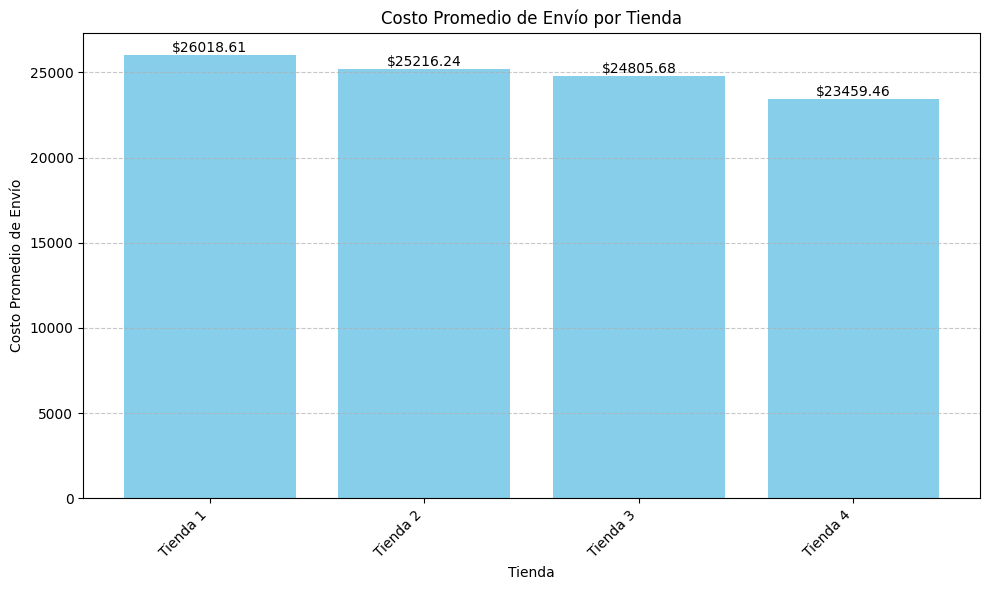

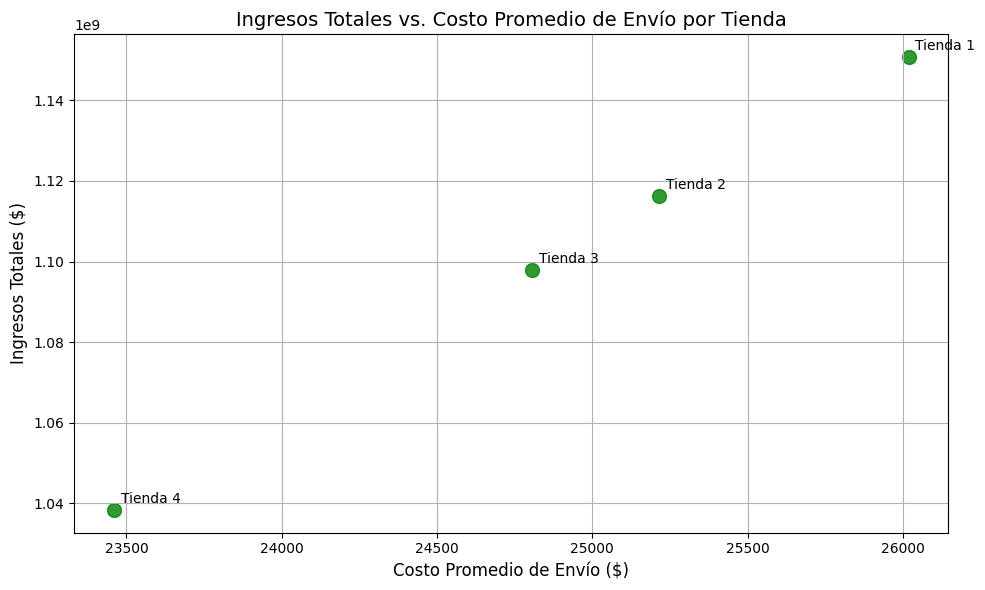

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

fuentes_datos_tiendas = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

def calcular_promedio_envio(url_csv_tienda, nombre_tienda):
        df_tienda = pd.read_csv(url_csv_tienda)
        promedio_envio = df_tienda['Costo de envío'].mean() #Promedio de toda la columna costo de envío
        return promedio_envio

costos_promedio_por_tienda = {}

# Calcular el costo promedio de envío para cada tienda
for nombre_tienda, url_csv in fuentes_datos_tiendas.items():
    costos_promedio_por_tienda[nombre_tienda] = calcular_promedio_envio(url_csv, nombre_tienda)
    print(f"Costo promedio de envío para {nombre_tienda}: ${costos_promedio_por_tienda[nombre_tienda]:.2f}")


# Gráfico de barras
if costos_promedio_por_tienda:
    nombres_tiendas = list(costos_promedio_por_tienda.keys())
    promedios_envio = list(costos_promedio_por_tienda.values())

    plt.figure(figsize=(10, 6))
    plt.bar(nombres_tiendas, promedios_envio, color='skyblue')
    plt.xlabel('Tienda')
    plt.ylabel('Costo Promedio de Envío')
    plt.title('Costo Promedio de Envío por Tienda')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
     # Añadir etiquetas con los valores en las barras
    for i, promedio in enumerate(promedios_envio):
        plt.text(i, promedio, f'${promedio:.2f}', ha='center', va='bottom')
    plt.show()



    ingresos_totales = {
    "Tienda 1": 1150880400.00,
    "Tienda 2": 1116343500.00,
    "Tienda 3": 1098019600.00,
    "Tienda 4": 1038375700.00
}

# Preparar los datos para el gráfico de dispersión
tiendas = list(costos_promedio_por_tienda.keys())
costos_envio = list(costos_promedio_por_tienda.values())
ingresos = [ingresos_totales[tienda] for tienda in tiendas]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(costos_envio, ingresos, color='green', s=100, alpha=0.8)  # s es el tamaño de los puntos

# Añadir etiquetas y título
plt.title('Ingresos Totales vs. Costo Promedio de Envío por Tienda', fontsize=14)
plt.xlabel('Costo Promedio de Envío ($)', fontsize=12)
plt.ylabel('Ingresos Totales ($)', fontsize=12)
plt.grid(True)

# Anotar los puntos con el nombre de la tienda
for i, tienda in enumerate(tiendas):
    plt.annotate(tienda, (costos_envio[i], ingresos[i]),
                 textcoords="offset points",
                 xytext=(5, 5),  # Desplazamiento de la etiqueta
                 ha='left')

plt.tight_layout()  # Mejora el espaciado para evitar que las etiquetas se superpongan
plt.show()
